In [1]:
import numpy as np
import cv2
import os

In [2]:
severity_code = {'MILD': 0,
                'MODERATE': 1,
                'NORMAL': 2,
                'SEVERE': 3}

In [3]:
source_folder_train = '/Users/aravdhoot/Remote-PD-Detection/energy_images_updated/Train'
channels = 3
resized_images_train = []

In [4]:
for severity in os.listdir(source_folder_train):
    for image in os.listdir(os.path.join(source_folder_train, severity)):
        file_path = os.path.join(source_folder_train, severity, image)
        image = cv2.imread(file_path)
        image_arr = cv2.resize(image, (250, 250))
        resized_images_train.append(image_arr)

num_samples = len(resized_images_train)
input_shape = (num_samples, 250, 250, channels)
input_array_train = np.empty(input_shape, dtype=np.uint8)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segm

In [5]:
input_array_train = np.array(resized_images_train)
print(input_array_train.shape)
x_train = input_array_train

y_train = list()
for severity in os.listdir(source_folder_train):
    for image in os.listdir(os.path.join(source_folder_train,severity)):
        y_train.append(severity_code[severity])

(291, 250, 250, 3)


In [6]:
source_folder_val = '/Users/aravdhoot/Remote-PD-Detection/energy_images_updated/Validation'
channels = 3
resized_images_val = []

In [7]:
for severity in os.listdir(source_folder_val):
    for image in os.listdir(os.path.join(source_folder_val, severity)):
        file_path = os.path.join(source_folder_val, severity, image)
        image = cv2.imread(file_path)
        image_arr = cv2.resize(image, (250, 250))
        resized_images_val.append(image_arr)

num_samples = len(resized_images_val)
input_shape = (num_samples, 250, 250, channels)
input_array = np.empty(input_shape, dtype=np.uint8)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corr

In [8]:
input_array_val = np.array(resized_images_val)
print(input_array.shape)
x_val = input_array

y_val = list()
for severity in os.listdir(source_folder_val):
    for image in os.listdir(os.path.join(source_folder_val,severity)):
        y_val.append(severity_code[severity])

(41, 250, 250, 3)


In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1))
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1))


/Users/aravdhoot/opt/anaconda3/envs/deep-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aravdhoot/opt/anaconda3/envs/deep-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

2023-12-06 23:14:57.726538: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-06 23:14:57.726561: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-06 23:14:57.726567: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-06 23:14:57.726754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-06 23:14:57.727019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
opt = tf.keras.optimizers.AdamW(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None,

In [12]:
epochs = 100
batch_size = 4

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/100


2023-12-06 23:14:59.068469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - 16s 109ms/step - loss: 5.7736 - accuracy: 0.2852 - val_loss: 1.3863 - val_accuracy: 0.1220
Epoch 2/100
73/73 [==============================] - 6s 77ms/step - loss: 4.8803 - accuracy: 0.2921 - val_loss: 1.3864 - val_accuracy: 0.1220
Epoch 3/100
73/73 [==============================] - 6s 76ms/step - loss: 3.8507 - accuracy: 0.3608 - val_loss: 1.3864 - val_accuracy: 0.0976
Epoch 4/100
73/73 [==============================] - 5s 75ms/step - loss: 3.3597 - accuracy: 0.3814 - val_loss: 1.3864 - val_accuracy: 0.0976
Epoch 5/100
73/73 [==============================] - 6s 76ms/step - loss: 2.5685 - accuracy: 0.3849 - val_loss: 1.3864 - val_accuracy: 0.0976
Epoch 6/100
73/73 [==============================] - 6s 76ms/step - loss: 2.9010 - accuracy: 0.4021 - val_loss: 1.3864 - val_accuracy: 0.2927
Epoch 7/100
73/73 [==============================] - 6s 76ms/step - loss: 2.3700 - accuracy: 0.4124 - val_loss: 1.3864 - val_accuracy: 0.2927
Epoch 8/100
73/7

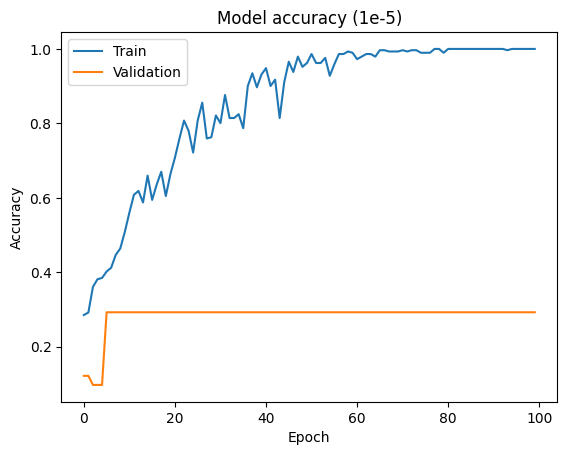

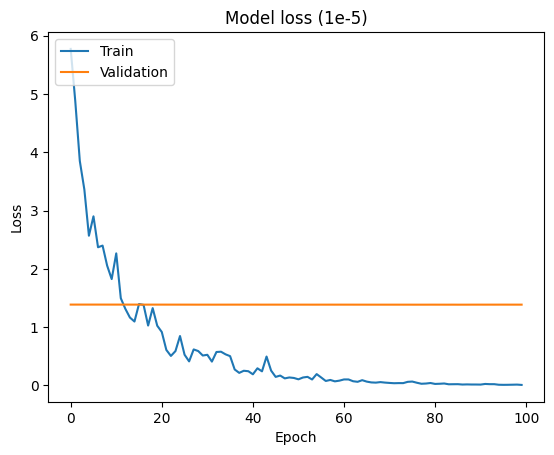

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy (1e-5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss (1e-5)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()